In [1]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [2]:
# 加载数据
digits = load_digits()
data = digits.data

In [3]:
# 数据探索
data.shape

(1797, 64)

In [4]:
# 查看第一幅图像
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [5]:
# 第一幅图像代表的数字含义
digits.target[0]

0

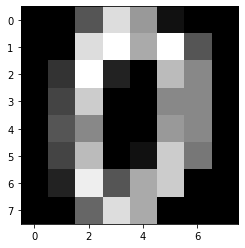

In [6]:
# 将第一幅图像显示出来
plt.gray()
plt.imshow(digits.images[0])
plt.show()

In [8]:
# 分割数据，将25%的数据作为测试集，其余作为训练集
train_x, test_x, train_y, test_y = train_test_split(data, digits.target, test_size=0.25, random_state=33)

In [9]:
# 采用Z-Score规范化
ss = preprocessing.StandardScaler()
train_ss_x = ss.fit_transform(train_x)
test_ss_x = ss.transform(test_x)

In [11]:
# 创建KNN分类器
knn = KNeighborsClassifier()
knn.fit(train_ss_x, train_y)
predict_y = knn.predict(test_ss_x)
'KNN准确率: %.4f' % accuracy_score(test_y, predict_y)

'KNN准确率: 0.9756'

In [12]:
# 创建SVM分类器
svm = SVC()
svm.fit(train_ss_x, train_y)
predict_y = svm.predict(test_ss_x)
'SVM准确率: %.4f' % accuracy_score(test_y, predict_y)

'SVM准确率: 0.9867'

In [13]:
# 采用Min-Max规范化
mm = preprocessing.MinMaxScaler()
train_mm_x = mm.fit_transform(train_x)
test_mm_x = mm.transform(test_x)

In [16]:
# 创建Navie Bayes分类器
mnb = MultinomialNB()
mnb.fit(train_mm_x, train_y)
predict_y = mnb.predict(test_mm_x)
'多项式朴素贝叶斯准确率: %.4f' % accuracy_score(test_y, predict_y)

'多项式朴素贝叶斯准确率: 0.8844'

In [17]:
# 创建CART决策树分类器
dtc = DecisionTreeClassifier()
dtc.fit(train_mm_x, train_y)
predict_y = dtc.predict(test_mm_x)
'CART决策树准确率: %.4f' % accuracy_score(test_y, predict_y)

'CART决策树准确率: 0.8600'